# Analysis on Model Training

In [1]:
import csv
import numpy as np
import sklearn
import skimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from google.colab import drive

# SPECIFY MAPPING,
T_MODEL = "DMP-T-vFINAL"
Ne_MODEL = "DMP-Ne-vFINAL"

# Model Training Analysis


Mounted at /content/drive


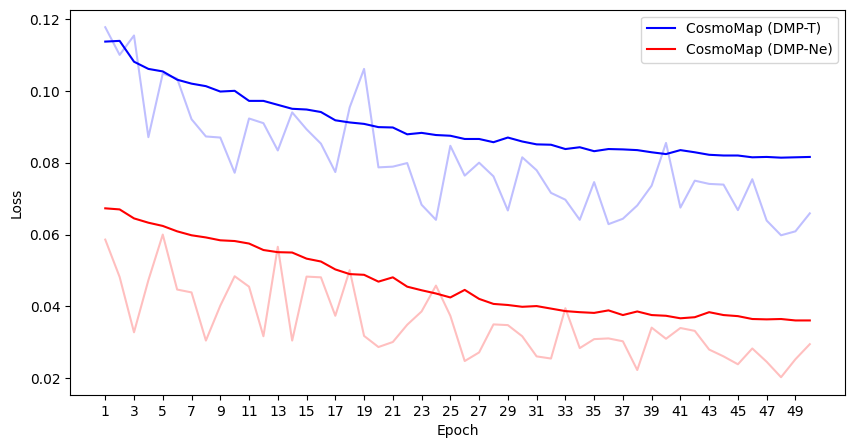

In [4]:
# Mounting drive,
drive.mount('/content/drive', force_remount=True)

# Logging files paths,
T_log_file_path = f"/content/drive/My Drive/Colab Notebooks/CosmoMap-PM1.6/{T_MODEL}-CHECKPOINTS/{T_MODEL}-LOGGING.csv"
Ne_log_file_path = f"/content/drive/My Drive/Colab Notebooks/CosmoMap-PM1.6/{Ne_MODEL}-CHECKPOINTS/{Ne_MODEL}-LOGGING.csv"

# Extracting validation losses,
epochs = []
T_validation_losses = []
T_training_losses = []
with open(T_log_file_path, mode="r") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
      T_validation_losses.append(round(float(row["Validation Loss"]), 4))
      T_training_losses.append(round(float(row["Training Loss"]), 4))
      epochs.append(row["Epoch"])

Ne_validation_losses = []
Ne_training_losses = []
with open(Ne_log_file_path, mode="r") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
      Ne_validation_losses.append(round(float(row["Validation Loss"]), 4))
      Ne_training_losses.append(round(float(row["Training Loss"]), 4))

# Plotting validation loss vs epoch,
fig, axes = plt.subplots(figsize=(10, 5))
plt.plot(epochs, T_validation_losses, label="CosmoMap (DMP-T)", color="blue")
plt.plot(epochs, Ne_validation_losses, label="CosmoMap (DMP-Ne)", color="red")
plt.plot(epochs, T_training_losses, color="blue", alpha=0.25)
plt.plot(epochs, Ne_training_losses, color="red", alpha=0.25)
step = max(1, len(epochs) // 25)
plt.xticks(ticks=np.arange(0, len(epochs), step), labels=epochs[::step])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()